In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingRegressor


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#!pip install scikit-optimize
#from skopt import BayesSearchCV

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df_=pd.get_dummies(df, drop_first= True)
df_

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [4]:
from sklearn import preprocessing

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
train,test = train_test_split(df,test_size=.2,random_state=42)

In [8]:
train.shape

(1070, 7)

In [9]:
train


,age,sex,bmi,children,smoker,region,charges
560,46,0,19.950,2,0,1,9193.83850
1285,47,0,24.320,0,0,0,8534.67180
1142,52,0,24.860,0,0,2,27117.99378
969,39,0,34.320,5,0,2,8596.82780
486,54,0,21.470,3,0,1,12475.35130
...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0,4561.18850
1130,39,0,23.870,5,0,2,8582.30230
1294,58,1,25.175,0,0,0,11931.12525
860,37,0,47.600,2,1,3,46113.51100


In [10]:
test

,age,sex,bmi,children,smoker,region,charges
764,45,0,25.175,2,0,0,9095.06825
887,36,0,30.020,0,0,1,5272.17580
890,64,0,26.885,0,1,1,29330.98315
1293,46,1,25.745,3,0,1,9301.89355
259,19,1,31.920,0,1,1,33750.29180
...,...,...,...,...,...,...,...
109,63,1,35.090,0,1,2,47055.53210
575,58,0,27.170,0,0,1,12222.89830
535,38,1,28.025,1,0,0,6067.12675
543,54,0,47.410,0,1,2,63770.42801


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [12]:
target = train.charges
x_train = train.drop(['charges'],axis=1)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,target)

LinearRegression()

In [15]:
y_test = test.charges
x_test = test.drop(['charges'],axis=1)

In [16]:
model.score(x_test,y_test)

0.7833463107364538

In [17]:
y_predict = model.predict(x_test)

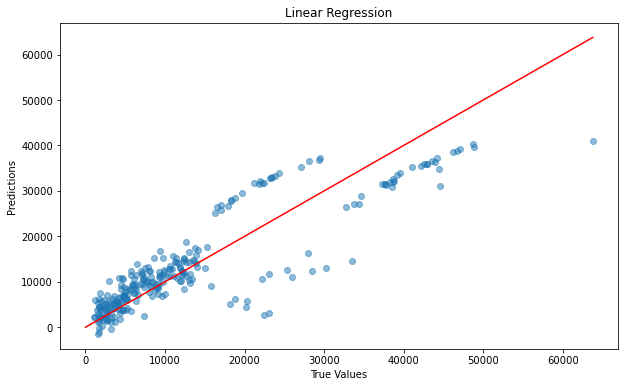

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), 'r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

In [21]:
coe = model.coef_
coe

array([ 2.57056264e+02, -1.87914567e+01,  3.35781491e+02,  4.25091456e+02,
        2.36478181e+04, -2.71284266e+02])

In [22]:
inter = model.intercept_
inter

-11946.606567263016

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('MAPE:', mape)
print('R^2:', r2)

MAE: 4186.508898366435
MSE: 33635210.43117842
MAPE: 0.470930295272956
R^2: 0.7833463107364538



#Lasso i ridge



In [25]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [27]:
X = df.drop('charges', axis=1)
y = df['charges']

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Regresja LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print('R2 score for LASSO regression:', lasso_r2)

R2 score for LASSO regression: 0.7833446285248615


In [32]:
# Regresja Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print('R2 score for Ridge regression:', ridge_r2)

R2 score for Ridge regression: 0.783342134531448


In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error


In [42]:
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)
lasso_smape = np.mean(2 * np.abs(lasso_pred - y_test) / (np.abs(y_test) + np.abs(lasso_pred))) * 100

In [36]:
print('MAE for LASSO regression:', lasso_mae)
print('MSE for LASSO regression:', lasso_mse)
print('MAPE for LASSO regression:', lasso_mape)
print('SMAPE for LASSO regression:', lasso_smape)

MAE for LASSO regression: 4186.520068141262
MSE for LASSO regression: 33635471.59239421
MAPE for LASSO regression: 47.09375242857553
SMAPE for LASSO regression: 40.092402743115976


In [43]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
ridge_smape = np.mean(2 * np.abs(ridge_pred - y_test) / (np.abs(y_test) + np.abs(ridge_pred))) * 100

In [38]:
print('MAE for Ridge regression:', ridge_mae)
print('MSE for Ridge regression:', ridge_mse)
print('MAPE for Ridge regression:', ridge_mape)
print('SMAPE for Ridge regression:', ridge_smape)

MAE for Ridge regression: 4186.653490446766
MSE for Ridge regression: 33635858.78170802
MAPE for Ridge regression: 47.09661628774382
SMAPE for Ridge regression: 40.09176144477834


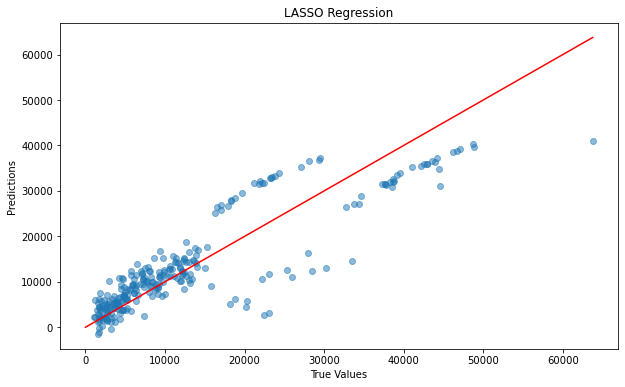

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), 'r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LASSO Regression')
plt.show()

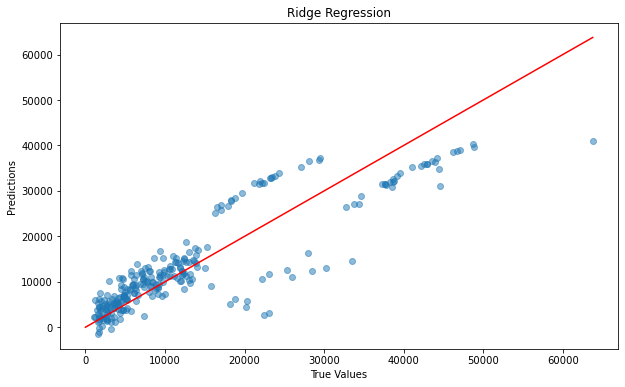

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot(np.linspace(0, max(y_test), 100), np.linspace(0, max(y_test), 100), 'r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression')
plt.show()